In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import joblib

In [3]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [7]:
df = pd.read_csv('/Users/yuvashankarnarayana/Documents/Projects/Reggression/diabetic_model_xgboost/diabetic_dataset.csv')

In [8]:
df.head()

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Diabetes_Status
0,0,58,Female,White,35.8,83.4,123.9,10.9,152,114,...,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1,1
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103,91,...,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1,0
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179,104,...,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0,0
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176,118,...,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0,0
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122,97,...,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0,0


In [9]:
df.drop(columns="Ethnicity",inplace=True)
df.drop(columns="Unnamed: 0",inplace=True)

In [10]:
df.head()

,Age,Sex,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Diabetes_Status
0,58,Female,35.8,83.4,123.9,10.9,152,114,197.8,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1,1
1,48,Male,24.1,71.4,183.7,12.8,103,91,261.6,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1,0
2,34,Female,25.0,113.8,142.0,14.5,179,104,261.0,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0,0
3,62,Male,32.7,100.4,167.4,8.8,176,118,183.4,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0,0
4,27,Female,33.5,110.8,146.4,7.1,122,97,203.2,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0,0


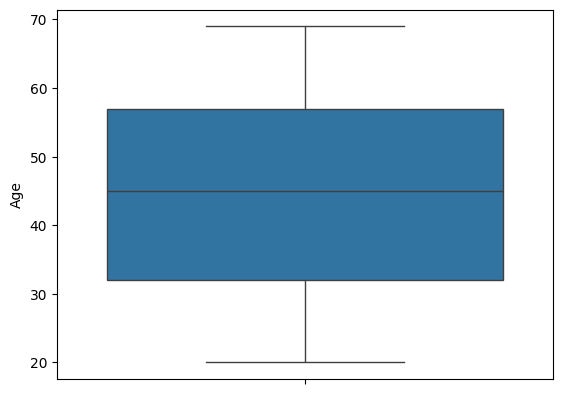

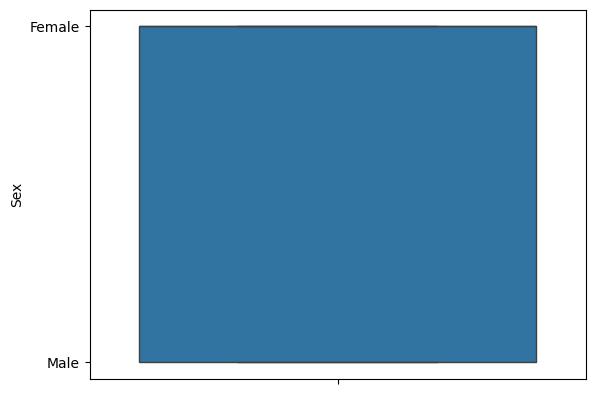

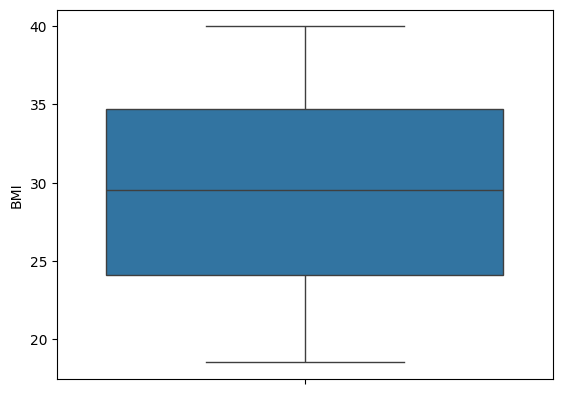

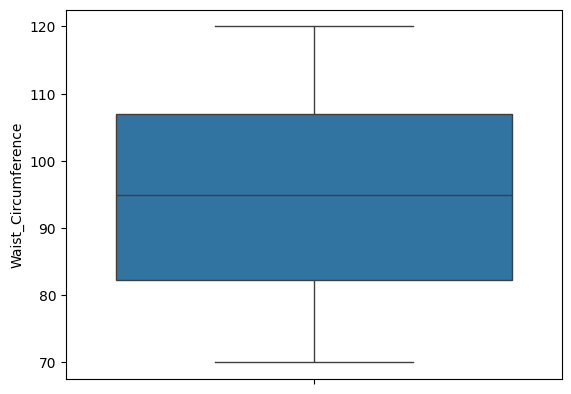

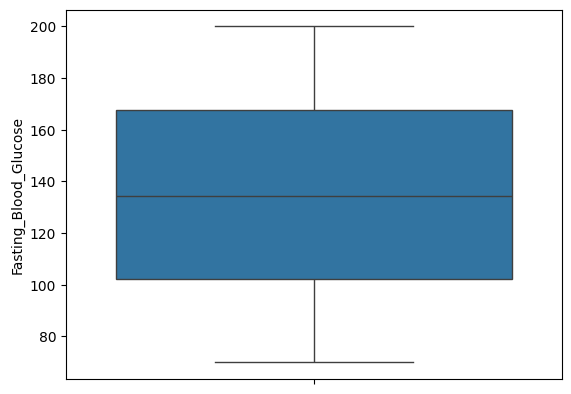

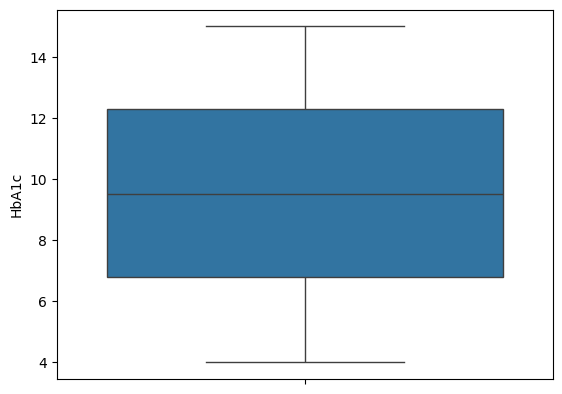

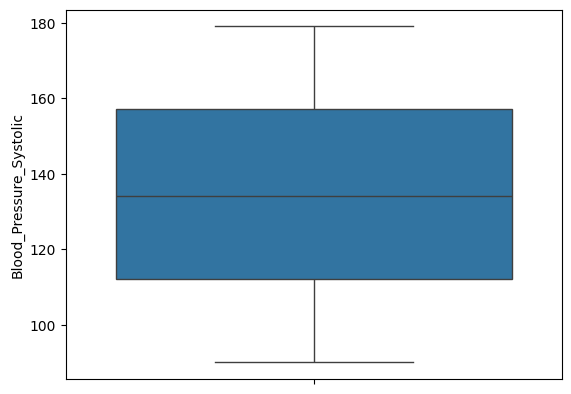

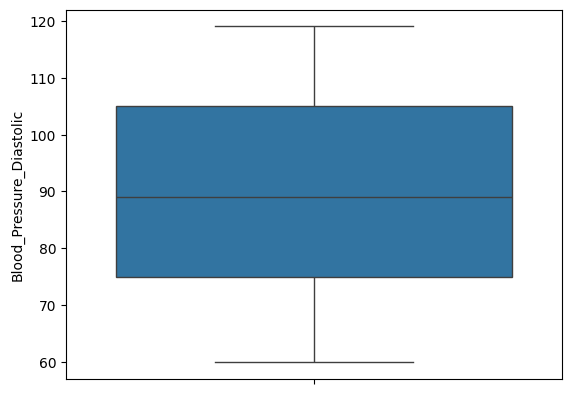

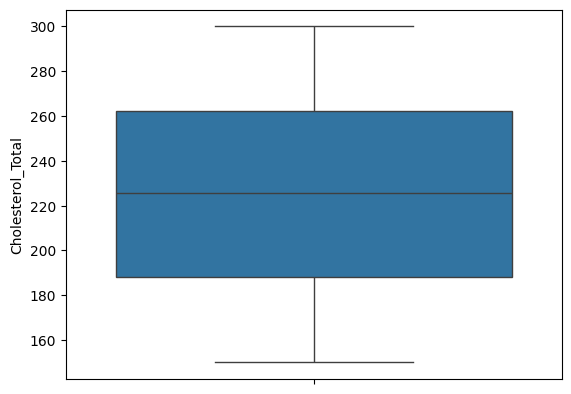

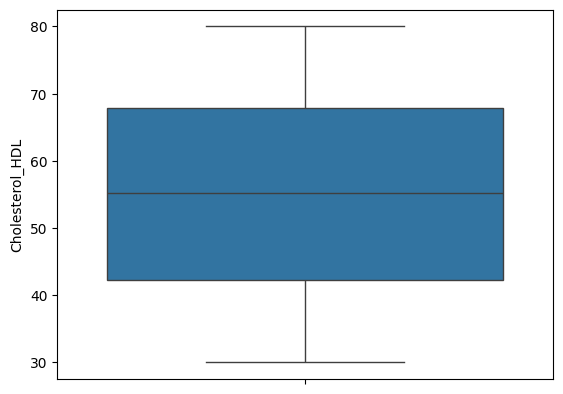

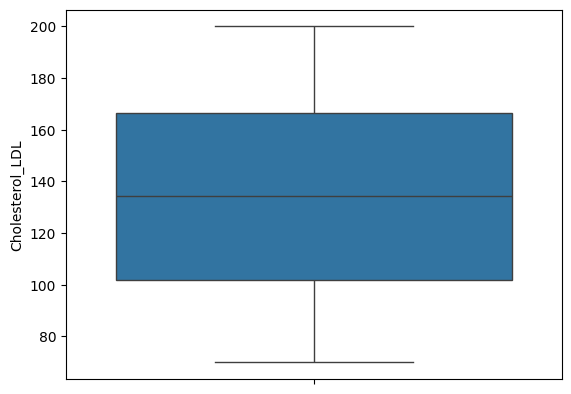

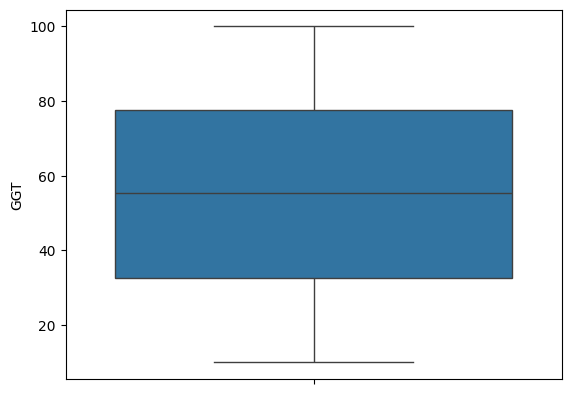

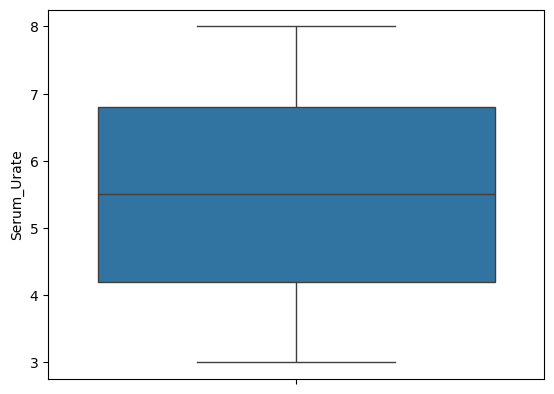

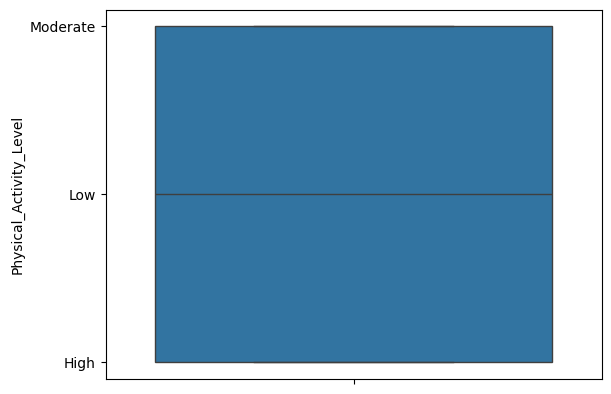

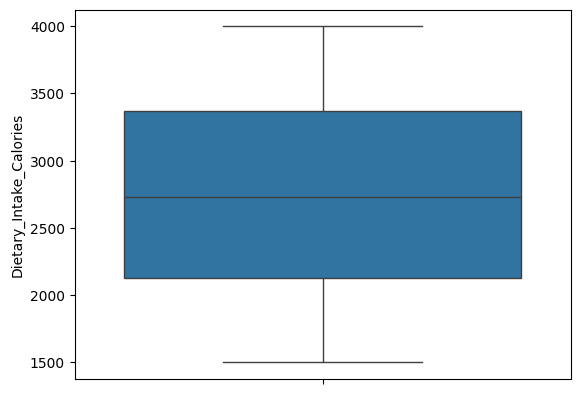

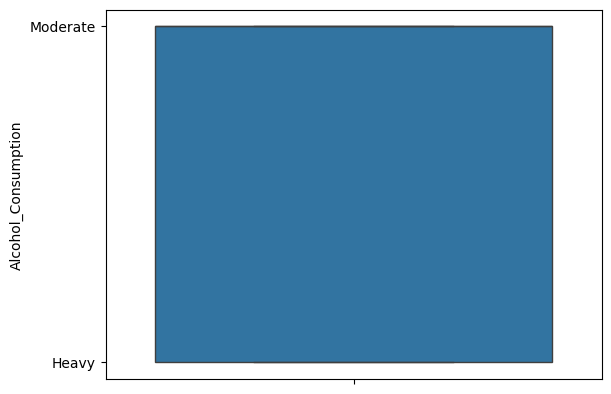

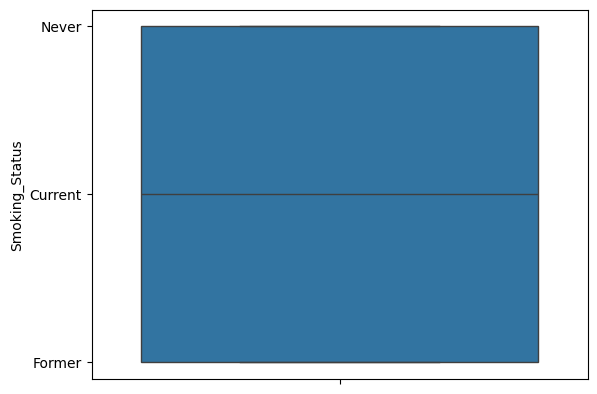

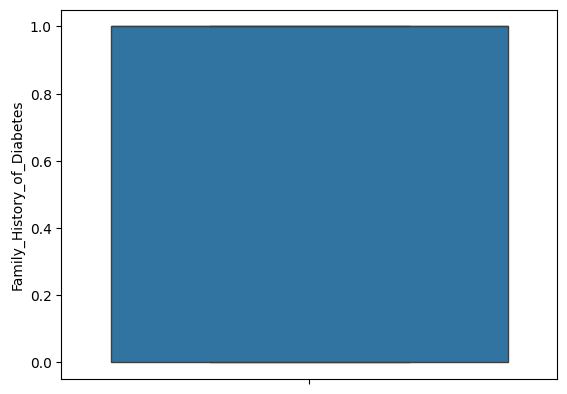

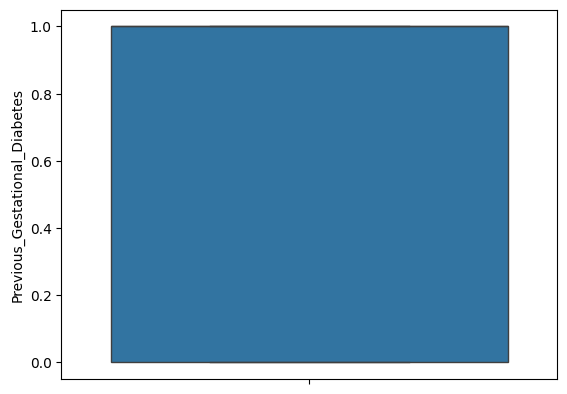

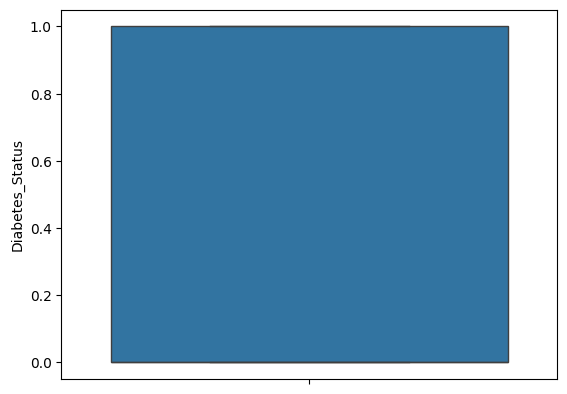

In [11]:
for i in df.columns:
  sns.boxplot(df[i])
  plt.show()

In [ ]:
df.describe()

In [15]:
df.replace({"Female":0,"Male":1},inplace=True)
df.replace({"Moderate":0,"Low":1,"High":2},inplace=True)
df.replace({"Never":0,"Current":1,"Former":2,})
df.replace({"Heavy":1,"NaN":2},inplace=True)
df.replace({"Never":0,"Current":1,"Former":2},inplace=True)

/var/folders/62/gqs95rb96tn4fy_q32xck61h0000gn/T/ipykernel_38328/1204106023.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Female":0,"Male":1},inplace=True)
/var/folders/62/gqs95rb96tn4fy_q32xck61h0000gn/T/ipykernel_38328/1204106023.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Moderate":0,"Low":1,"High":2},inplace=True)
/var/folders/62/gqs95rb96tn4fy_q32xck61h0000gn/T/ipykernel_38328/1204106023.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future

In [16]:
df.head()

,Age,Sex,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Diabetes_Status
0,58,0,35.8,83.4,123.9,10.9,152,114,197.8,50.2,99.2,37.5,7.2,0,1538,0.0,0,0,1,1
1,48,1,24.1,71.4,183.7,12.8,103,91,261.6,62.0,146.4,88.5,6.1,0,2653,0.0,1,0,1,0
2,34,0,25.0,113.8,142.0,14.5,179,104,261.0,32.1,164.1,56.2,6.9,1,1684,1.0,2,1,0,0
3,62,1,32.7,100.4,167.4,8.8,176,118,183.4,41.1,84.0,34.4,5.4,1,3796,0.0,0,1,0,0
4,27,0,33.5,110.8,146.4,7.1,122,97,203.2,53.9,92.8,81.9,7.4,0,3161,1.0,1,0,0,0


In [17]:
df.isnull().sum()

Age                                 0
Sex                                 0
BMI                                 0
Waist_Circumference                 0
Fasting_Blood_Glucose               0
HbA1c                               0
Blood_Pressure_Systolic             0
Blood_Pressure_Diastolic            0
Cholesterol_Total                   0
Cholesterol_HDL                     0
Cholesterol_LDL                     0
GGT                                 0
Serum_Urate                         0
Physical_Activity_Level             0
Dietary_Intake_Calories             0
Alcohol_Consumption              3320
Smoking_Status                      0
Family_History_of_Diabetes          0
Previous_Gestational_Diabetes       0
Diabetes_Status                     0
dtype: int64

In [18]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputed_data = imputer.fit_transform(df)

In [19]:
imputed_df = pd.DataFrame(imputed_data,columns=df.columns)

In [20]:
imputed_df.head()

,Age,Sex,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Diabetes_Status
0,58.0,0.0,35.8,83.4,123.9,10.9,152.0,114.0,197.8,50.2,99.2,37.5,7.2,0.0,1538.0,0.0,0.0,0.0,1.0,1.0
1,48.0,1.0,24.1,71.4,183.7,12.8,103.0,91.0,261.6,62.0,146.4,88.5,6.1,0.0,2653.0,0.0,1.0,0.0,1.0,0.0
2,34.0,0.0,25.0,113.8,142.0,14.5,179.0,104.0,261.0,32.1,164.1,56.2,6.9,1.0,1684.0,1.0,2.0,1.0,0.0,0.0
3,62.0,1.0,32.7,100.4,167.4,8.8,176.0,118.0,183.4,41.1,84.0,34.4,5.4,1.0,3796.0,0.0,0.0,1.0,0.0,0.0
4,27.0,0.0,33.5,110.8,146.4,7.1,122.0,97.0,203.2,53.9,92.8,81.9,7.4,0.0,3161.0,1.0,1.0,0.0,0.0,0.0


In [21]:
imputed_df.columns

Index(['Age', 'Sex', 'BMI', 'Waist_Circumference', 'Fasting_Blood_Glucose',
       'HbA1c', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic',
       'Cholesterol_Total', 'Cholesterol_HDL', 'Cholesterol_LDL', 'GGT',
       'Serum_Urate', 'Physical_Activity_Level', 'Dietary_Intake_Calories',
       'Alcohol_Consumption', 'Smoking_Status', 'Family_History_of_Diabetes',
       'Previous_Gestational_Diabetes', 'Diabetes_Status'],
      dtype='object')

array([[<Axes: title={'center': 'Age'}>, <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Waist_Circumference'}>],
       [<Axes: title={'center': 'Fasting_Blood_Glucose'}>,
        <Axes: title={'center': 'HbA1c'}>,
        <Axes: title={'center': 'Blood_Pressure_Systolic'}>,
        <Axes: title={'center': 'Blood_Pressure_Diastolic'}>],
       [<Axes: title={'center': 'Cholesterol_Total'}>,
        <Axes: title={'center': 'Cholesterol_HDL'}>,
        <Axes: title={'center': 'Cholesterol_LDL'}>,
        <Axes: title={'center': 'GGT'}>],
       [<Axes: title={'center': 'Serum_Urate'}>,
        <Axes: title={'center': 'Physical_Activity_Level'}>,
        <Axes: title={'center': 'Dietary_Intake_Calories'}>,
        <Axes: title={'center': 'Alcohol_Consumption'}>],
       [<Axes: title={'center': 'Smoking_Status'}>,
        <Axes: title={'center': 'Family_History_of_Diabetes'}>,
        <Axes: title={'center': 'Previous_Gestational

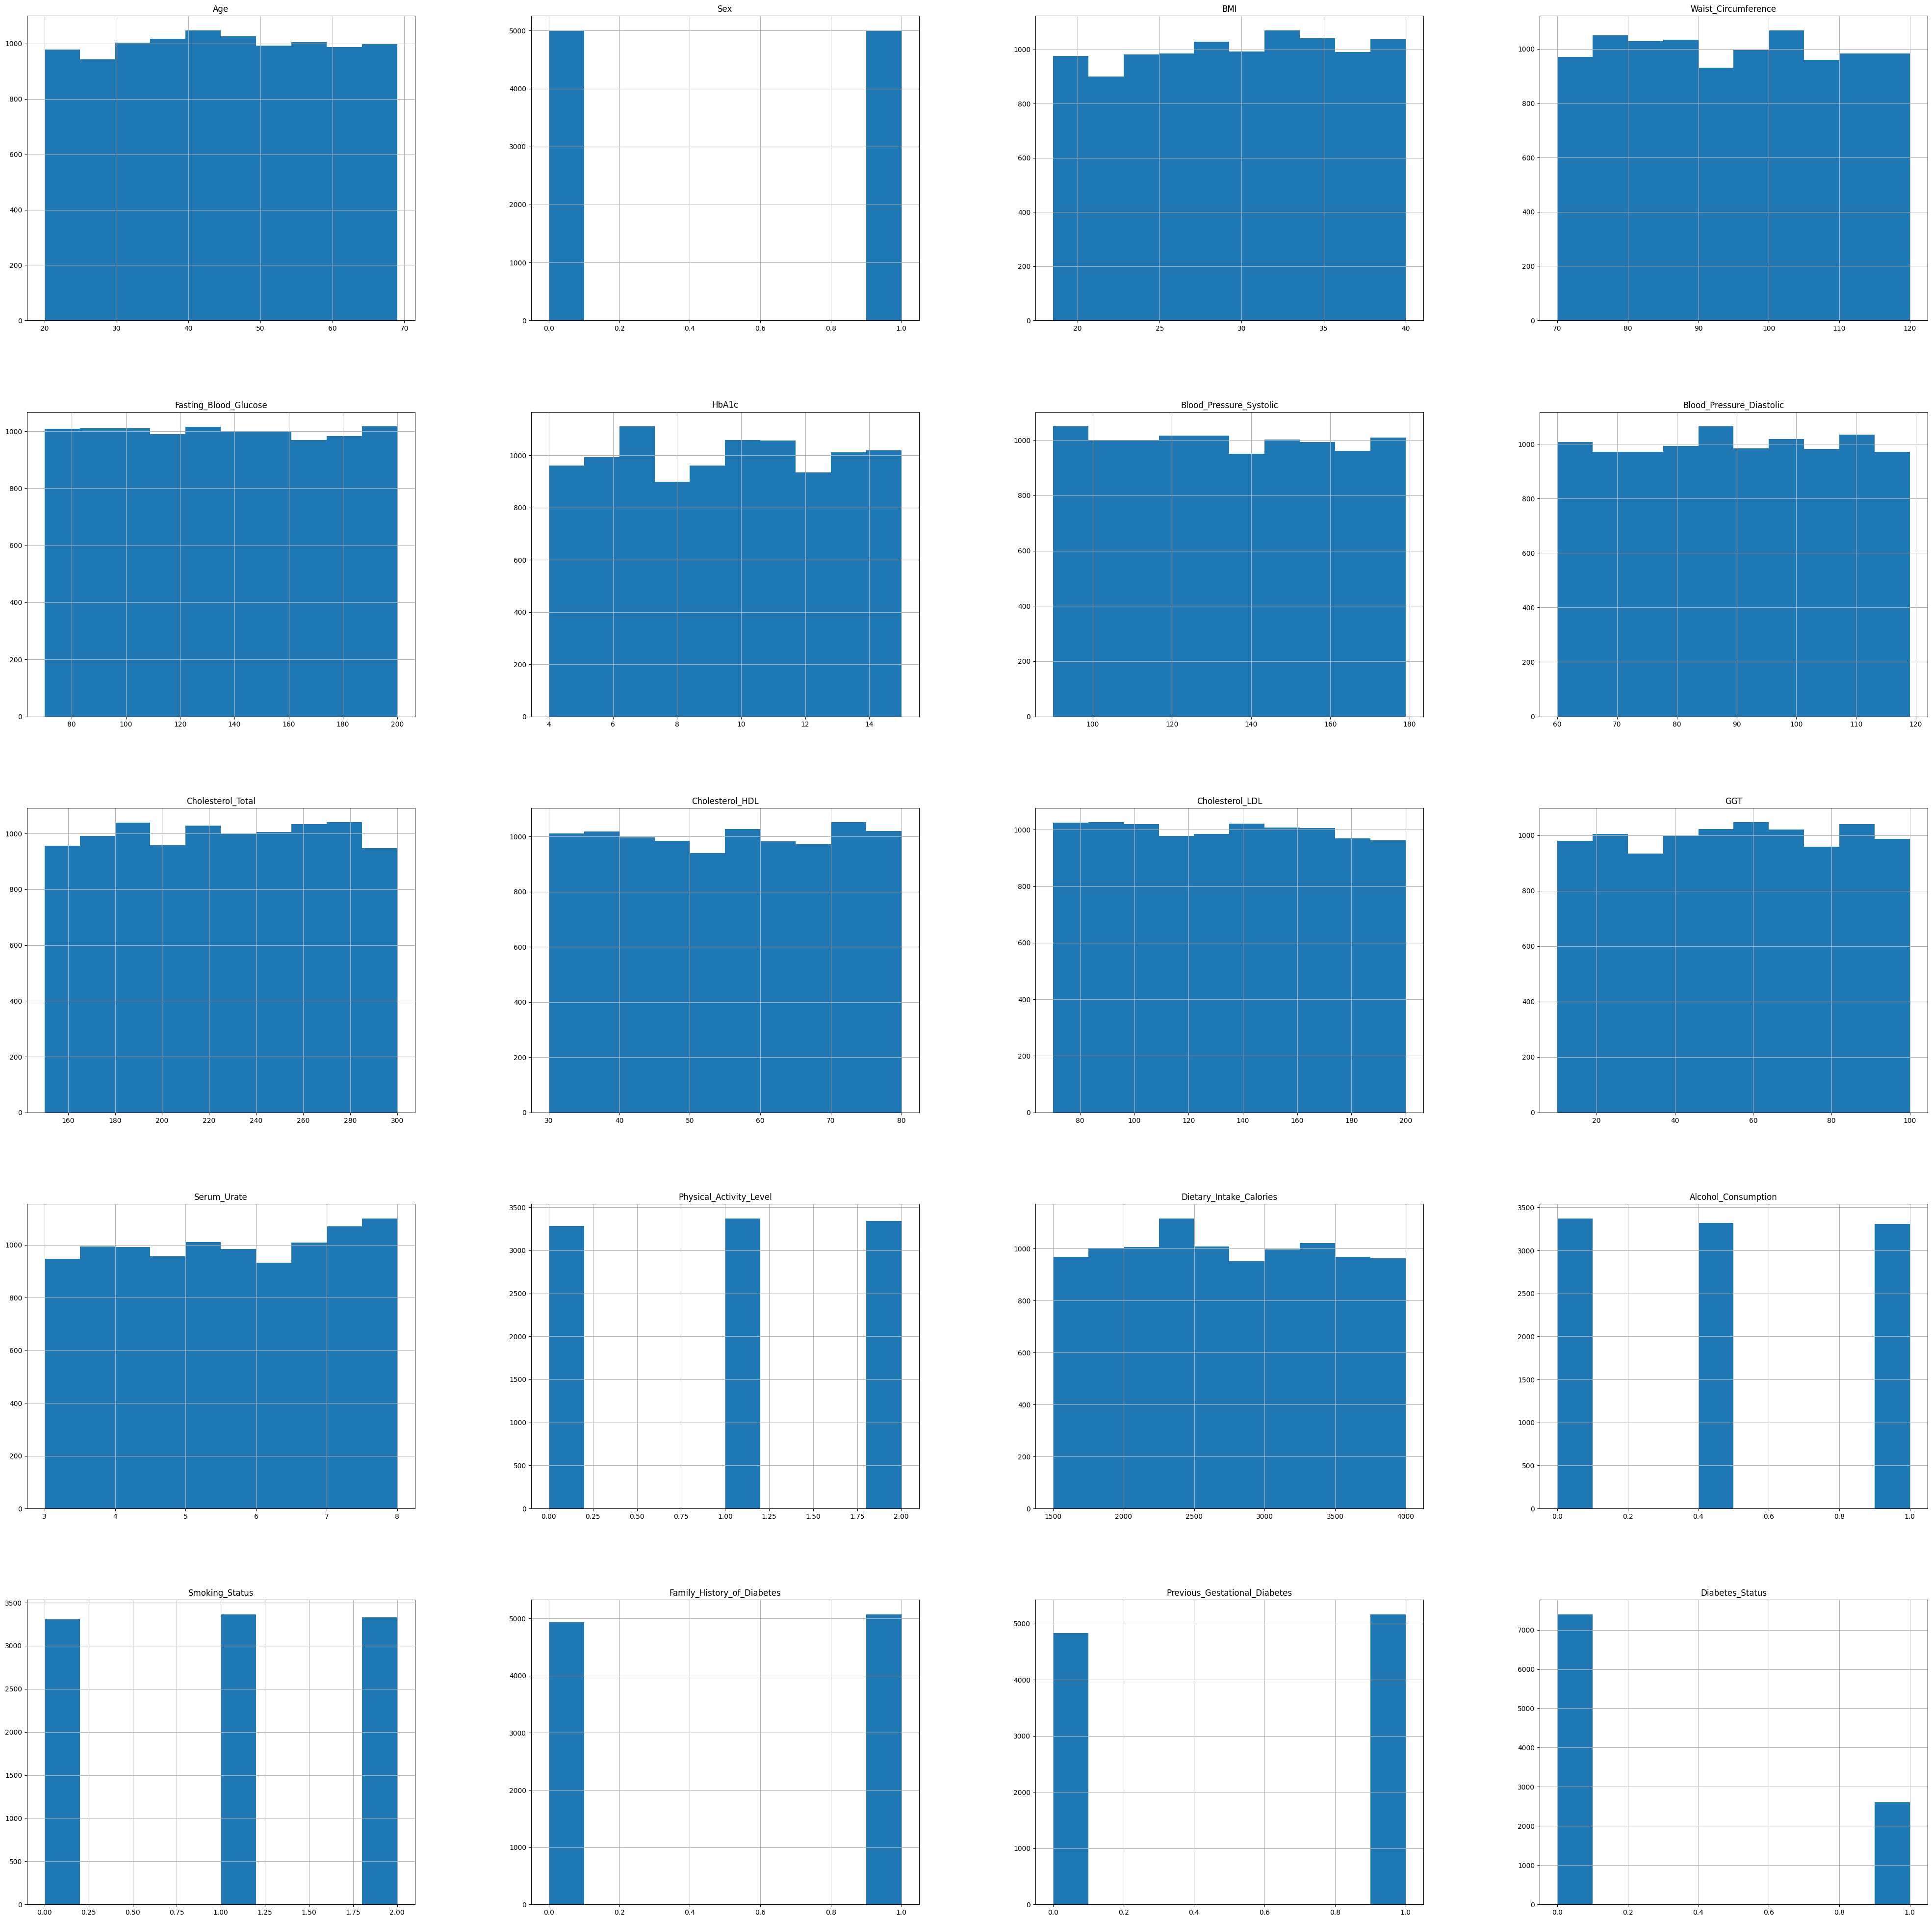

In [22]:
imputed_df.hist(figsize=(50,50))

In [23]:
x = imputed_df.drop(columns="Diabetes_Status")
y = imputed_df["Diabetes_Status"]

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [25]:
x_train.shape


(8000, 19)

In [26]:
x_test.shape


(2000, 19)

In [28]:
y_train.shape


(8000,)

In [27]:
y_test.shape

(2000,)

In [29]:
model = XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [30]:
y_predict = model.predict(x_test)

In [31]:
result = pd.DataFrame({"Actual":y_test,"Predicted":y_predict})

In [32]:
result.head()

,Actual,Predicted
5770,1.0,0.998933
6382,0.0,0.000029
1119,0.0,0.000041
8027,0.0,-0.000009
4313,0.0,0.000076


In [33]:
result.to_csv("result.csv")

In [34]:
r2_score(y_test,y_predict)

0.9816707548764165

In [35]:
joblib.dump(model,'diabetic_prediction.pkl')
joblib.dump(imputer,'imputer.pkl')

['imputer.pkl']